# Linear Algebra Project: Special Relativity

In this project we will investigate the <a href="https://en.wikipedia.org/wiki/Special_relativity"> Special Theory of Relativity</a> (SR), formulated using linear algebra. Those of you who have previous learned about SR have possibly heard terms like 'four-vector' tossed around. In fact, one of the great insights of SR was that one, in order to make a proper description of motions, needed to treat space and time on equal footing, and thus write the whole theory with vectors that also has a time component.

It is often the case that one can solve a problem in one "frame", but want the result in another. To transform a result (a position or velocity, represented as a vector) from one frame to another, linear algebra is used. Linear algebra is really a good language for theories of motion, especially relativistic theories.

There are exercises written in the text. You should add your answers in a new cell below the exercise. Some exercises require you to do some pen and paper math, this should be properly explained in the answer. You can write latex math in the notebook using `$` delimiter, just double-click on any math in the intructions to see examples.

Some exercises require you to do some coding in python and make figures. The code must be executable in the notebook, and should produce desired figures/results/etc. when executed. The code is also expected to be legible, with sensible variable names, and adequately commented.

The exercise consists of three parts, as numbered sections in this notebook. The three parts are
   1. Galilean transformations and aberration of starlight
   2. Derivation of the Lorentz transformation  
   3. Relativistic aberration    

Once a part of the exercise is completed, save all work, including questions and everything, and send the notebook per email to your instructor. Information about deadlines is in a separate document.

Have fun!

<!--- %%latex -->
# 1. Galilei transformations#

Before going to SR, it is useful to introduce the central concepts in the context of ordinary classical mechanics. Transformations between corrdinate systems moving with a constant speed wrt. each other, are called Galilei transformations, after <a href="http://en.wikipedia.org/wiki/Galileo_Galilei">Galileo Galilei</a>.
Given two systems, $S$ and $S'$, where $S'$ is moving with the velocity $v$, along the $x$-direction, with respect to $S$, we have a linear relationship between the space-time coordinates of the two systems:

$\begin{pmatrix} t' \\ x' \end{pmatrix}
 = \Gamma \begin{pmatrix} t \\ x \end{pmatrix}$ with $\Gamma = \begin{pmatrix} 1 & 0 \\ -v & 1 \end{pmatrix}$.
 
It is trivial to see, that a transformation with velocity only in the $x$-direction has no influence on the $y$- and $z$-coordinates, and we write here only *one* space coordinate ($x$) (as it simplifies notation). Transformations with respect to velocities in the $y$ and $z$ directions are of course similar.

**Exercise 1.1**

How does the transformation matrix look for velocities (*i.e.* first derivative wrt. $t$)? Derive this, and confirm that the $\Gamma$-matrix is identical for the two.

**Exercise 1.2**

Write in python a class representing a two-vector in space, *i.e.* the position vector $(x,y)$ or equivalently $(v_x, v_y)$, the velocities in the two directions. Since the $t$ component does not transform, it should not be included, but you may have to consider it in some of the methods anyway.

The class should include the following methods:
* A constructor taking an $x$- and $y$-coordinate as argument.
* Given a two-vector, return the angle between the $x$-axis and the two-vector.
* Given another two-vector, representing velocity, return the corresponding Galilei transformed vector.

**Exercise 1.3: Classical aberration of starlight**

A good example of effects from such coordinate transformations, is the <a href="https://en.wikipedia.org/wiki/Aberration_of_light">aberration of starlight</a>. When we observe a star from earth, which is moving with a velocity with respect to the star, the apparent position of the star depends on the velocity of the earth -- see the figure (from <a href="https://en.wikipedia.org/wiki/File:Simple_stellar_aberration_diagram.svg">Wikimedia commons</a>).

![Aberration of starlight](https://upload.wikimedia.org/wikipedia/commons/9/93/Simple_stellar_aberration_diagram.svg "Aberration of starlight")

Use the python class you implemented above to make a plot showing $\phi(v)$ given $\theta = 90^\circ, 80^\circ$ and $70^\circ$. Test your implementation by comparing the $\theta = 90^\circ$ case to the analytic result: $\phi(v) = 90^\circ - \text{atan}(v/c)$. 
Feel free to find appropriate parameters for earth velocity. For convenience, you can set the speed of light to 1, and in these units set $v = 10^{-4}$ to $10^{0}$.



** Exercise 1.1 **
\begin{equation*}
    t = t'
\end{equation*}
\begin{equation*}
 G =
    \begin{bmatrix}
    1 & 0 \\
    -v & 1
    \end{bmatrix}
\rightarrow
g_1 =
    \begin{bmatrix}
    1 & 0
    \end{bmatrix}
\mbox{  and  } g_2 =
    \begin{bmatrix}
    v & 1
    \end{bmatrix}
\end{equation*}

From there we can derive the following expression for x'

\begin{equation*}
    x' = g_2 \cdot 
    \begin{pmatrix}
        t \\
        x
    \end{pmatrix} 
\end{equation*}
\begin{equation*}
    \frac{\mbox{d}}{\mbox{d}t'} x' = \frac{\mbox{d}}{\mbox{d}t} (  g_2 \cdot 
    \begin{pmatrix}
        t \\
        x
    \end{pmatrix} )
    = g_2 \cdot \frac{\mbox{d}}{\mbox{d}t} 
        \begin{pmatrix}
        t \\
        x
        \end{pmatrix}
\end{equation*}
\begin{equation*}
    v' = g_2 \cdot 
    \begin{pmatrix}
        1 \\
        v_0
    \end{pmatrix} 
\end{equation*}
                    

In [18]:
import numpy as np
from scipy import *
from scipy.linalg import norm

class TwoVector:
	
	def __init__(self, x, y):
		self.x=x
		self.y=y
		
	def angle(self):
		e1=np.array([1, 0]) #creates an unitvector along x
		z=np.array([self.x, self.y]) #z is the TwoVector as an array
		theta=np.arccos((dot(z, e1))/norm(z)) #here the angle to the x-axis is calculated
		return theta
		
	def Galilei(self, relativevelocity): #Relativevelocity is the velocity of S' along the x-axis
		vxprim = matmul(np.array([relativevelocity, 1]), np.array([1,self.x])) #vprim calculation on x-axis
		vyprim = matmul(np.array([0, 1]), np.array([1,self.y])) #vprim calculation on y-axis
		return TwoVector(vxprim,vyprim) #return of vprim vector

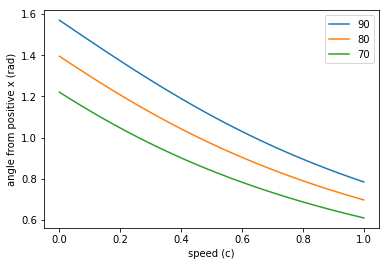

In [25]:
import matplotlib.pyplot as plt

def vector(deg): #This function creates an unitvector with "deg" degrease angle to the x-axis
	deg = pi/180 *deg
	return (np.cos(deg),np.sin(deg))

deglist = [90,80,70] #the thetha angles used in exercise 1.3

for a in range(3):
	vtransform = []
	for v in linspace(10e-4,1,100):		
		aprim = TwoVector(vector(deglist[a])[0],vector(deglist[a])[1]).Galilei(v) #transforming the vector, note that c=1
		vtransform.append(aprim.angle()) # adding all the transformed angles to a list.
		
	plt.plot(linspace(10e-4,1,100), vtransform) #ploting the angles with respect to v
	plt.legend(deglist)
	plt.xlabel('speed (c)')	
	plt.ylabel('angle from positive x (rad)')
    
plt.show()
    

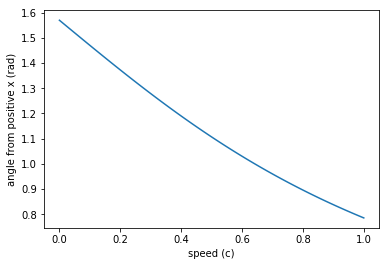

In [26]:
listan2 = [] #polting the analytic referense fi(v) = 90 - arctan(v/c)
for v in linspace(10e-4,1,100):
	listan2.append(1/2*pi - arctan(v)) #c=1 gives the expresion
plt.plot(linspace(10e-4,1,100),listan2, '-')
plt.xlabel('speed (c)')	
plt.ylabel('angle from positive x (rad)')

plt.show()

#The analytic result corespond very well with our plot for 90 degrees.  

#Harald Öhrn, Viktor Hrannar Jónsson, Johan Nilsson, Jonathan Petersson

# 2. Minkowski space and Special Relativity

### Minkowski space
We have by now gotten used to the fact that linear transformations can help us solve problems in physics - at least Newtonian physics. In this part we will replace the Newtonian physics with Special Relativity, and following, we will see how this changes the result of the aberration exercise.

Again we want to compare two different inertial coordinate systems, called $S$ and $S'$. Only this time we will not  assume how the transformation matrix looks, we will instead derive it from the assumption underlying SR - that the speed of light is the same in either system. Furthermore assume:

* The axes of $S$ and $S'$ are parallel, and (the origin of) $S'$ moves at constant, positive velocity with respect to $S$.
* The time readings of $S$ and $S'$ are calibrated such that when the origins of $S$ and $S'$ are equal, also the times $t$ and $t'$ are equal, and furthermore equal to zero.
* We work in units where the speed of light is equal to 1, and unitless, so we don't have to drag a factor of $c$ around everywhere.
 
We can now write *space-time coordinates* down for events in the systems $S$ and $S'$:
$w = \begin{pmatrix} t \\ x \\ y \\ z \end{pmatrix}$ and $w' = \begin{pmatrix} t' \\ x' \\ y' \\ z' \end{pmatrix}$
Given the velocity with which $S'$ moves wrt. to $S$, we want to find, similarly to $\Gamma$ in the first exercise, a mapping $\Lambda: \mathbb{R}^4 \mapsto \mathbb{R}^4$:
$\Lambda \begin{pmatrix} t \\ x \\ y \\ z \end{pmatrix} = \begin{pmatrix} t' \\ x' \\ y' \\ z' \end{pmatrix}.$

We take as an axiom that if: 
$\Lambda \begin{pmatrix} t \\ x \\ y \\ z \end{pmatrix} = \begin{pmatrix} t' \\ x' \\ y' \\ z' \end{pmatrix}$, then  $y'=y$ and $z'=z$. Thus we shall from this point on write four-vectors with the $y$ and $z$ coordinate supressed: $\begin{pmatrix} t \\ x \end{pmatrix}$

We now begin the work of characterizing $\Lambda$. The first thing we need to note, is that the four-vectors don't live in ordinary Euclidean space, but in the Minkowski space. Vectors in Minkowski space can still be written as a linear combination of $e_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $e_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, but the inner product is now different.

Suppose that a flash of light is emitted from the origin of $S$ and $S'$, right when the origins intersect. After a time $t$ or $t'$ in the two systems respectively, the flash of light is visible from each point whose distance to the origin is exactly $t$ or $t'$ respectively, as we work in units where the speed of light is equal to one. In other words, all points whose space time coordinates satisfy:

In $S: x^2 - t^2 = 0$

In $S': (x')^2 - (t')^2 = 0$

The two expressions are both equal to 0, and therefore equal to each other. They also resemble the ordinary inner product of two vectors, except for the minus sign in front of the $t$. We therefore define a new inner product in Minkowski space:

Let $\eta = \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}$. Then the Minkowski inner product between two vectors $w_1$ and $w_2$ is: $w_1 \otimes w_2 = w_1 \eta w_2 = x_1x_2 -t_1t_2 $.

Note that the Minkowski inner product of a vector with itself is then $\Lambda$-invariant, *i.e.* the same in $S$ and $S'$.

**Exercise 2.1**

Show that $w_1 \otimes w_2 = w_2 \otimes w_1$.

**Exercise 2.2**

Show that $w_1 \otimes (w_2 + w_3) = w_1\otimes w_2 + w_1 \otimes w_3$. 

**Exercise 2.3**

Show that $e_1, e_2$ is in fact an orthonormal basis for Minkowski space.

**Exercise 2.4**

Show that while $\begin{pmatrix} 1 \\ 1 \end{pmatrix}, \begin{pmatrix} 1 \\ -1 \end{pmatrix}$ is an orthogonal basis for Euclidean space, it is not for Minkowski space.

**Exercise 2.5**

Find similarly two vectors which makes an orthogonal basis for Minkowski space and not Euclidean space.

**Exercise 2.6**

Sometimes the Minkowski inner product is defined slightly differently, with $\eta = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$. Convince yourself that the conclusions from **Exercise 2.1-2.4** still holds with this redefinition. (You don't need to write any answer)

**Answer 2.1**

$$ w_1\otimes w_2=\begin{pmatrix} t_1 \\ x_1 \end{pmatrix} \otimes \begin{pmatrix} t_2 \\ x_2 \end{pmatrix}=\begin{pmatrix} t_1 \\ x_1 \end{pmatrix}\begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} t_2 \\ x_2 \end{pmatrix}=\begin{pmatrix} -t_1 \\ x_1 \end{pmatrix}\begin{pmatrix} t_2 \\ x_2 \end{pmatrix}=x_1 x_2 - t_1 t_2 $$

$$ w_2\otimes w_1=\begin{pmatrix} t_2 \\ x_2 \end{pmatrix} \otimes \begin{pmatrix} t_1 \\ x_1 \end{pmatrix}=\begin{pmatrix} t_2 \\ x_2 \end{pmatrix}\begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} t_1 \\ x_1 \end{pmatrix}=\begin{pmatrix} -t_2 \\ x_2 \end{pmatrix}\begin{pmatrix} t_1 \\ x_1 \end{pmatrix}=x_1 x_2 - t_1 t_2 $$

This means that $w_1\otimes w_2=w_2\otimes w_1$.


** Answer 2.2 ** 
$$ w_1 \otimes (w_2+w_3)= \begin{pmatrix} t_1 \\ x_1 \end{pmatrix} \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}\left(\begin{pmatrix} t_2 \\ x_2 \end{pmatrix}+\begin{pmatrix} t_3 \\ x_3 \end{pmatrix}\right)=
\begin{pmatrix} -t_1 \\ x_1 \end{pmatrix}\left(\begin{pmatrix} t_2 \\ x_2 \end{pmatrix}+\begin{pmatrix} t_3 \\ x_3 \end{pmatrix}\right)
= \\ \begin{pmatrix} -t_1 \\ x_1 \end{pmatrix}\begin{pmatrix} t_2 \\ x_2 \end{pmatrix}+\begin{pmatrix} -t_1 \\ x_1 \end{pmatrix}\begin{pmatrix} t_3 \\ x_3 \end{pmatrix}=w_1 \otimes w_2 +w_1 \otimes w_3 $$

** Answer 2.3 **

$$ e_1 \otimes e_2= \begin{pmatrix}1\\ 0 \end{pmatrix}\begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \end{pmatrix}=\begin{pmatrix}-1\\ 0 \end{pmatrix}\begin{pmatrix}0\\1 \end{pmatrix}=0 $$

This means that $e_1$ and $e_2$ is a orthonormal basis for Minkowski space.

** Answer 2.4 **

Euclidean space:
$$ \begin{pmatrix} 1 \\ 1 \end{pmatrix} \begin{pmatrix} 1 \\ -1 \end{pmatrix}=1-1=0 $$

Minkowski space:
$$ \begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ -1 \end{pmatrix}=\begin{pmatrix} 1 \\ 1 \end{pmatrix} \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} 1 \\ -1 \end{pmatrix}
  =\begin{pmatrix} -1 \\ 1 \end{pmatrix}\begin{pmatrix} 1 \\ -1 \end{pmatrix}=-1-1=-2 $$

The vectors form an orthogonal basis for Euclidean space but not for Minkowski space.

** Answer 2.5 **

Here we see an example of the vectors that form an orthogonal basis for Minkowski space but not for Euclidean space.

Euclidean space:
$$ \begin{pmatrix} 1 \\ 2 \end{pmatrix} \begin{pmatrix} 2 \\ 1 \end{pmatrix}= 2+2=4 $$

Minkowski space:
$$ \begin{pmatrix} 1 \\ 2 \end{pmatrix} \otimes \begin{pmatrix} 2 \\ 1 \end{pmatrix}=\begin{pmatrix} 1 \\ 2 \end{pmatrix} \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} 2 \\ 1 \end{pmatrix}=\begin{pmatrix} 1 \\ 2 \end{pmatrix}\begin{pmatrix} -2 \\ 1 \end{pmatrix}=-2+2=0 $$

### Lorentz transformation
We are now ready to find the desired transformation matrix. We write it in the most general way, and use our knowledge about its behaviour to establish connections between its elements. The most general way of writing $\Lambda$, is:
$\Lambda = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$.

Let us first consider the transformation of the origin. Since we know (from the postulates) that the origins coincides at $t = t' = 0$, we can write:

Origin of $S$: $\begin{pmatrix}t' \\ -vt'\end{pmatrix} = \Lambda \begin{pmatrix} t \\ 0 \end{pmatrix}$

Origin of $S'$: $\begin{pmatrix}t' \\ 0\end{pmatrix} = \Lambda \begin{pmatrix} t \\ vt \end{pmatrix}$ 


**Exercise 2.7: Simplification of $\Lambda$**

Use the above two equations to simplify $\Lambda$ to:
$\Lambda = \begin{pmatrix} a & b \\ -va & a \end{pmatrix}$.

**Exercise 2.8: Final derivation of $\Lambda$**

We can use the result from **2.7** and the fact that the Minkowski inner product of a vector with itself is $\Lambda$-invariant, to constrain the elements of $\Lambda$ even further. Write up a vector $w=\begin{pmatrix} t \\ x \end{pmatrix}$ in $S$ and $S'$, using the general form of $\Lambda$ derived in **Exercise 2.7**. Show that $a$ and $b$ are further constrained by:

$b = -av$ and $a = \frac{1}{\sqrt{1-v^2}}$.

by requiring that $w$ is $\Lambda$ invariant.




** Answer 2.7 **

$S: \begin{pmatrix} t' \\ -vt' \end{pmatrix}=\Lambda \begin{pmatrix} t \\ 0 \end{pmatrix}=\begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix} t \\ 0 \end{pmatrix}=\begin{pmatrix} at \\ ct \end{pmatrix} \Rightarrow \begin{pmatrix} at \\ ct\end{pmatrix}=\begin{pmatrix} t' \\ -vt' \end{pmatrix}=t'\begin{pmatrix} 1 \\ -v \end{pmatrix} \Rightarrow t\begin{pmatrix} a \\ c \end{pmatrix}=t'\begin{pmatrix} 1 \\ -v \end{pmatrix} \Rightarrow a=\frac{t'}{t} , c=a(-v)$
 
$S': \begin{pmatrix} t' \\ 0 \end{pmatrix}=\begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix} t \\ vt \end{pmatrix}=\begin{pmatrix} at+bvt \\ ct+dvt \end{pmatrix} \Rightarrow \begin{pmatrix} 1 \\ 0 \end{pmatrix}=\frac{1}{t'}\begin{pmatrix} at+bvt \\ ct+dvt \end{pmatrix}= \begin{pmatrix} \frac{a}{a}+\frac{b}{a'}vt \\ \frac{-a}{a'}v+\frac{d}{a'}v \end{pmatrix}\Rightarrow 1=1+\frac{b}{a'}v , 0=-v+\frac{d}{a'}v \Rightarrow d =a \Rightarrow \Lambda = \begin{pmatrix} a & b \\ -av & a \end{pmatrix}$

** Answer 2.8 **

Invariance gives:

\begin{align}
\Lambda w \otimes \Lambda w &= w \otimes w \\ 
(at+bx)^2-(-vat+ax)^2 &= t^2 -x^2 \\
a^2t^2+2atbx+b^2x^2-v^2a^2t^2+2va^2tx-a^2x^2 &= t^2 -x^2 \\ 
t^2(a^2-v^2a^2)+x^2(b^2-a^2)+tx(2ab+2va^2) &= t^2 -x^2 
\end{align}

We can see that the expressen before $t^2$ must be equal to one, the one before $x^2$ should be equal to -1 and the $tx$ term should be equal to zero. 

$$
\begin{cases}
\begin{align}
a^2 - v^2 a^2 &= 1 \\
b^2 - a^2 &= -1 \\
2ba + 2va^2 &= 0
\end{align}
\end{cases}
$$

$$
\begin{cases}
\begin{align}
a^2(1-v^2) &= 1 \\
b^2 - a^2 &= -1 \\
2ba + 2va^2 &= 0
\end{align}
\end{cases}
$$

$$
\begin{cases}
\begin{align}
a &= \frac{1}{\sqrt{1-v^2}} \\
b^2 &= a^2 - 1 \\
2ba + 2va^2 &= 0
\end{align}
\end{cases}
$$

From this we can express $b$ with two equations. We chose the third equation in the system. 

\begin{align}
2ba + 2va^2 &= 0 \\
2ba &= -2va^2 \\
b &= -va
\end{align}

Therefore we have shown that $b = -av$ and $a = \frac{1}{\sqrt{1-v^2}}$, as this is true for the second equation aswell.


### The transformation matrix
You have now derived the Lorentz transformation matrix:
$\Lambda = \frac{1}{\sqrt{1-v^2}}\begin{pmatrix} 1 & -v \\ -v & 1 \end{pmatrix}$. 

Before moving on and implementing it in Python, we will show a couple of properties.

**Exercise 2.9**

Write up $\Lambda$ in four dimensions (still only with velocity in the $x$-direction). Restore missing factors of $c$ in the matrix.

**Exercise 2.10: Inverse transformation**

Write up the transformation from $S'$ to $S$ in two ways. First by replacing $v$ with $-v$, then by inverting $\Lambda$. Show that the two approaches gives an identical result.

**Exercise 2.11: Time dilation**

A spaceship leaves Earth at a fixed velocity $v$ relative to Earth. At time $t$, measured on Earth, derive how long time will have passed measured in the spaceship.

**Exercise 2.12: Relativistic velocity addition**

Consider three coordinate systems, $S$, $S'$ and $S''$. The speed of $S'$ wrt. $S$ is $v_1$ and the speed of $S''$ wrt. $S'$ is $v_2$. What is the speed ($v_3$) of $S''$ wrt. $S$? To test your result you can insert the limiting case $v_2$ being the speed of light, since that should be the same in $S$ and $S'$.

**Exercise 2.13: Reducing to Galilei**

Show that in the limit $v \ll c$, $\Lambda$ reduces to $\Gamma$. For this exercise, use the version of $\Lambda$ where factors of $c$ have been recovered.

** Answer 2.9 **

$\Lambda$ in four dimensions 

$ \Lambda = \frac{1}{\sqrt{1-v^2}} \begin{pmatrix}1&-v&0&0\\-v&1&0&0\\0&0&\sqrt{1-v^2}&0\\0&0&0&\sqrt{1-v^2} \end{pmatrix} $

$\Lambda w =\begin{pmatrix}t'\\x'\\y\\z\end{pmatrix}=\frac{1}{\sqrt{1-v^2}}\begin{pmatrix}1&-v&0&0\\-v&1&0&0\\0&0&\sqrt{1-v^2}&0\\0&0&0&\sqrt{1-v^2} \end{pmatrix}\begin{pmatrix}t\\x\\y\\z\end{pmatrix}=\begin{pmatrix}t-vx\\x-vt\\y\\z\end{pmatrix}$

The units in the last matrix should be time ($s$) for the first row and distance ($m$) for the remaining rows. As we can see this is not the case in the first row and if we would multiple every row with $\frac{1}{\sqrt{1-v^2}}$ no units would be correct. To fix this we restore missing factors of $c$.


$\Lambda = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}} \begin{pmatrix}1&\frac{-v}{c^2}&0&0\\-v&1&0&0\\0&0&\sqrt{1-\frac{v^2}{c^2}}&0\\0&0&0&\sqrt{1-\frac{v^2}{c^2}} \end{pmatrix} $

**Answer 2.10**

$\Lambda^{-1} = \begin{pmatrix}1&v&0&0\\v&1&0&0\\0&0&1&0\\0&0&0&1 \end{pmatrix}\frac{1}{\sqrt{1-v^2}}$

$$\begin{vmatrix}1&-v&0&0\\-v&1&0&0\\0&0&1&0\\0&0&0&1 \end{vmatrix}\begin{vmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1 \end{vmatrix} $$ Multiply row one with $\frac{1}{v}$ and add to row two. Do likewise with row two. $$ \begin{vmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1 \end{vmatrix}\begin{vmatrix}1&v&0&0\\v&1&0&0\\0&0&1&0\\0&0&0&1 \end{vmatrix}$$

**Answer 2.11**

$\Lambda=\begin{pmatrix} 1 & -v \\ -v & 1 \end{pmatrix}, \gamma =\frac{1}{\sqrt{1-v^2}}$

$\Lambda\begin{pmatrix}t\\x\end{pmatrix}=\begin{pmatrix}t'\\x'\end{pmatrix}\Rightarrow \frac{1}{\sqrt{1-v^2}}\begin{pmatrix}t-vx\\x-vt\end{pmatrix}=\begin{pmatrix}t'\\x'\end{pmatrix}\Rightarrow t'=\gamma(t-vx)$

**Answer 2.12**

The system $S''$ has coordinates $(t',x')$ in $S'$ and a relative velocity to $S'$ 

$$
v_2 = \frac{dx'}{dt'}.
$$

We know that $(t,x) = \Lambda^{-1} (t', x')$ where $(t,x)$ is $S''$ coordinates in $S$ and that $S''$ has the relative velocity 

$$
v_3 = \frac{dx}{dt}.
$$

Thus,

$$
\begin{pmatrix}
    dt\
    dx
    \end{pmatrix}
    = \gamma
    \begin{pmatrix}
    dt' + \frac{v_{1}dx'}{c^2} \
    dx' + v_{1}dt'
\end{pmatrix}
$$

and

\begin{align}
v_{3} &=
\frac{\gamma}{\gamma}
\frac{dx' + v_{1}dt'}{dt' + \frac{v_{1}dx'}{c^2}} \\
&= \frac{(dx' + v_{1}dt')\frac{1}{dt'}}{(dt' + \frac{v_{1}dx'}{c^2})\frac{1}{dt'}} \\
&= \frac{v_{2} + v_{1}}{1 + \frac{v_{1}v_{2}}{c^2}}.
\end{align}


We now have a  expression for the relativistic addition of velocity.

Testing with $v_2 = c$,

\begin{align}
    v_3 &= \frac{c + v_1}{1 + \frac{v_1c}{c^2}} \\
        &= \frac{c + v_1}{\frac{c + v_1}{c}} \\
        &= c
\end{align}

We see that no mater how fast $S'$ moves in relation to $S$ $S''$ will move with the speed of light in both system.


**Answer 2.13**

$\Lambda= \frac{1}{\sqrt{1-\frac{v^2}{c^2}}} \begin{pmatrix} 1 & -\frac{v}{c^2} \\ -v & 1 \end{pmatrix} $

If $v << c$, then $ \frac{-v}{c^2} \rightarrow 0$ and $ \frac{1}{\sqrt{1-\frac{v^2}{c^2}}} \rightarrow 1 $. Therefore we get the same matrix as $\Gamma$. 

$ \begin{pmatrix} 1 & 0 \\ -v & 1 \end{pmatrix} = \Gamma $


# 3. Time dilation and relativistic aberration
The transformation matrix have now been derived by you, and you are now ready to start solving exercises using it. We will again solve the problem programmatically in Python.

**Exercise 3.1**
Write a FourVector class with the following methods:
* A constructor taking arguments x1, x2, x3 and x4, which should be set as attributes for the object.
* A Minkowski product method, which takes as input another four vector, and returns the Minkowski product of the two.    
* A method which takes as input a velocity in the $x$-direction. This is the velocity of another frame, relative to the frame where your FourVector lives. The method should return a new FourVector, boosted to the new system.

Calculate two examples for each of the methods by hand, and use them to control that your implementation works.

**Exercise 3.2: Time dilation**
We now want to investigate the phenomenon of time dilation, using our FourVector class. We imagine a space rocket travelling away from earth with a velocity $v$.

* Use the method defined in exercise 3.1 for transforming a FourVector to construct a figure showing the time on earth, as percieved by the astronaut in the spaceship (or vice versa), as a function of velocity.

**Exercise 3.3: Relativistic aberration**
We can now solve the aberration problem from exercise 1.3 with relativistic corrections.
* Write up the transformation for a *spatial* velocity vector ($v_x, v_y, v_z$), when transformed by a velocity in the $x$ direction. (Ignore the time component, as this will not be of use here anyway.
* Construct a class representing a velocity, call it VelocityVector. 
* Add a method which takes as input a velocity (in the $x$ direction) and returns a new VelocityVector where the  components are transformed accordingly.
* Construct, similarly to exercise 1.3, a plot af $\phi(v)$. Compare the 90$^\circ$ case to the analytic one that, in this case, reads $\phi(v) = 90^\circ - \text{asin}(v/c)$
* Comment on the differences between the classical and the relativistic case.
* Bonus exercise to solve for fun: Use the formulas for velocity addition you derived in exercise 2.12 to derive the full analytic solution to the problem. Verify that it reduces to the above solution for $\theta = 90^\circ$.

** Answer 3.1 **

We know that,
$$t'=\gamma(t-vx)$$
$$x'=\gamma(x-vt).$$

Vector $(1, 2, 3, 4)$ and $v=0.3$ is our first example. Then, 

$$ t'=\frac{1}{\sqrt{1-0.3^2}}(1-0.3\times2)\approx 0.419 \space\text{s}$$
$$ x'=\frac{1}{\sqrt{1-0.3^2}}(2-0.3\times1)\approx 1.782  \space\text{m/s}$$

Vector $(1, 3, 5, 7)$ and $v=0.9$ is our second example. Then, 

$$ t'=\frac{1}{\sqrt{1-0.9^2}}(1-0.9\times3)\approx -3.900 \space\text{s}$$
$$ x'=\frac{1}{\sqrt{1-0.9^2}}(3-0.9\times1)\approx 4.818  \space\text{m/s}$$


In [1]:
from scipy import * 
import numpy as np
import matplotlib.pyplot as plt

#Exercise 3.1

class FourVector:
	
	def __init__(self, x1, x2, x3, x4):
		self.x1 = x1
		self.x2 = x2
		self.x3 = x3
		self.x4 = x4
		self.ProductMatrix = np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
		
	def Minkowski(self, vec): #vec is the FourVector which should be multiplyed with.
		return matmul(np.array([self.x1, self.x2, self.x3, self.x4]),matmul(self.ProductMatrix, np.array([vec.x1, vec.x2, vec.x3, vec.x4])))
		#Above is based on the defenition of the Minkowski product given in excersice 2.
       
        #note c = 1
	def Transform(self, velocity, showVector=False):
		gamma = 1/sqrt(1 - velocity**2) #define the gamma factor and the Lambda matrix below.
		Lambda = gamma * np.array([[1, -velocity, 0, 0], [-velocity, 1, 0, 0], [0, 0, 1/gamma, 0], [0, 0, 0, 1/gamma]])
		T = matmul(Lambda, np.array([self.x1, self.x2, self.x3, self.x4])) # Matrix multiplication of Lambda and the original
		if showVector == True:
			return np.array([T[0], T[1], T[2], T[3]])
		else:
			return FourVector(T[0], T[1], T[2], T[3])
        # vector gives the transformed vector

In [2]:
#verifying our calculations in exercise 3.1

Example1 = FourVector(1, 2, 3, 4)
ex1 = Example1.Transform(0.3, showVector=True)

Example2 = FourVector(1, 3, 5, 7)
ex2 = Example2.Transform(0.9, showVector=True)

print('ex1: t prime =' + str(ex1[0]), 'x prime =' + str(ex1[1]))
print('ex2: t prime =' + str(ex2[0]), 'x prime =' + str(ex2[1]))

ex1: t prime =0.419313934689 x prime =1.78208422243
ex2: t prime =-3.9000674758 x prime =4.81773041128


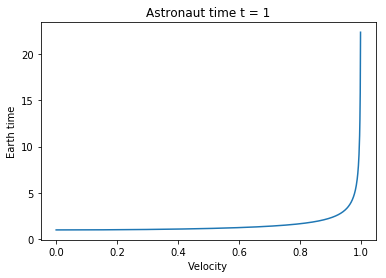

In [3]:
#Exercice 3.2

#at time t=1 (from the astronauts perspective)
astronaut = FourVector(1,0,0,0)
ylist = []
xlist = []

for n in linspace(0,1, 1000, False):
	#print(astronaut.Transform(n))
	xlist.append(n)
	ylist.append(astronaut.Transform(n, showVector=True)[0])
	
plt.plot(xlist, ylist)
plt.title("Astronaut time t = 1")
plt.xlabel("Velocity")
plt.ylabel("Earth time")

plt.show()

** Answer 3.3 **

We know from exercise 2.12 that

$$ v_x' = \frac{v_x + v}{1 + v_x v}. $$

From exercise 2.9 we know that $ dt'=\gamma(dt-udx), dy'=dy \space \text{and} \space dz'=dz $, where $u$ is the veolicty between the systems along the x-axis. We can then express $\frac{dy'}{dt'}$ as following, 

$$ \frac{dy'}{dt'} = \frac{dy}{\gamma(dt-udx)} = \frac{dy \frac{1}{dt}}{\gamma(\frac{dt-udx}{dt})} = \frac{\gamma^{-1}v_y}{1-uv_x}. $$

Conclusion, 

$$ v_y' = \frac{\gamma^{-1}v_y}{1-uv_x} $$

and by symmetry, 

$$ v_z' = \frac{\gamma^{-1}v_z}{1-uv_z}. $$

Therefore, the transformation for a spatial velocity vector is the following: 

$$
\begin{pmatrix}
\frac{v_x + v}{1 + v_x v} \\ \frac{\gamma^{-1}v_y}{1-uv_x} \\ \frac{\gamma^{-1}v_z}{1-uv_z}
\end{pmatrix}
$$


In [4]:
#Exercise 3.3

class VelocityVector:
	
	def __init__(self, vx, vy, vz):
		
		self.vx = vx
		self.vy = vy
		self.vz = vz

	def Transform(self, velocity):
		gamma = 1/sqrt(1 - velocity**2) 
		#Using the formula for velocity addition we derived in exercise 2.12
		vxprim = (self.vx + velocity)/(1 + self.vx * velocity)
		vyprim = (gamma**(-1)*self.vy)/(1-velocity*self.vx)
		vzprim = (gamma**(-1)*self.vz)/(1-velocity*self.vx)
		return VelocityVector(vxprim, vyprim, vzprim)


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


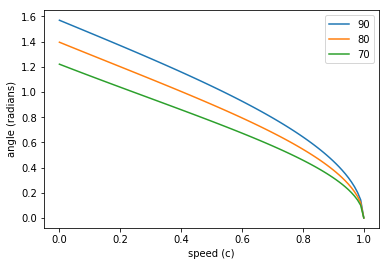

In [13]:
#Result 3.3

def vector(deg): #This function creates an directionalvector in the stars direction when our ships vector is along the x-axis
	deg = pi/180 *deg
	return VelocityVector(np.cos(deg), np.sin(deg), 0)

deglist = [90,80,70] #the theta angles

for a in range(3):
	vtransform = []
	for shipspeed in linspace(10e-4,1,100):		
		aprim = vector(deglist[a]).Transform(shipspeed)
		phi = np.arccos(dot(np.array([1,0,0]), np.array([aprim.vx,aprim.vy,aprim.vz]))) #transforming the stars directionalvector and projecting it on to the x-axis. 
		#note that in the above row, we should divide the inside of the arccos with our directional vectors norm, which is equal to 1.
		vtransform.append(phi) #collect the data in a list, which will be plotted
		
	plt.plot(linspace(10e-4,1,100), vtransform) #ploting the angles with respect to shipspeed
	plt.legend(deglist)
	plt.xlabel('speed (c)')	
	plt.ylabel('angle (radians)')
    
plt.show()

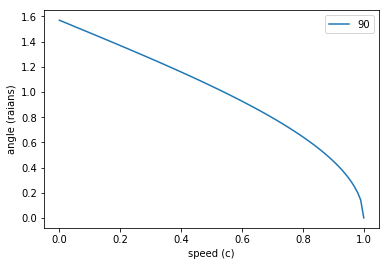

In [12]:
#Analytic result 3.3

angle = []
for v in linspace(10e-4,1,100):
	phi = pi/2 - np.arcsin(v)
	angle.append(phi)
	
plt.plot(linspace(10e-4,1,100), angle) #ploting the angles with respect to v
plt.legend(deglist)
plt.xlabel('speed (c)')	
plt.ylabel('angle (raians)')

plt.show()

** Comparing the graphs to 1.3: **

If we compare the graphs to the ones we did in exercise 1.3, we can see that in the relativistic case the differences between the different angles gets smaller as the velocity approach the speed of light. We can also see that in the in relativistic case it gets more dramatic (graph gets steeper) as is approach the speed of light, while in exercise 1.3 it was the opposite (the graph flattens out).